# Multiple Linear Regression

## Importing the libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [12]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
print(y)

Another quick method to create X and y

In [22]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [29]:
X = dataset[['R&D Spend','Administration','Marketing Spend', 'State']].values

In [27]:
y = dataset['Profit'].values

In [ ]:
print(X)

In [ ]:
print(y)

## Encoding categorical data

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [43]:
lm.intercept_

42467.52924853204

In [44]:
lm.coef_

array([ 8.66e+01, -8.73e+02,  7.86e+02,  7.73e-01,  3.29e-02,  3.66e-02])

In [50]:
y_pred = lm.predict(X_test)

In [51]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [52]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

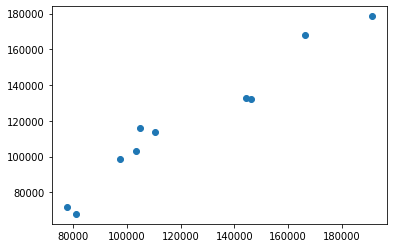

In [53]:
plt.scatter(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


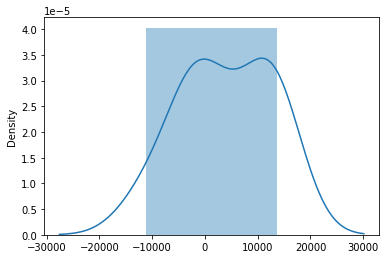

In [57]:
sns.distplot(y_test-y_pred)

In [58]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Metrics to evaluate

In [60]:
from sklearn import metrics

In [61]:
metrics.mean_absolute_error(y_test, y_pred)

7514.2936596433165

In [62]:
metrics.mean_squared_error(y_test, y_pred)

83502864.03256583

In [63]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

9137.990152794313

In [64]:
metrics.r2_score(y_test, y_pred)

0.9347068473282515